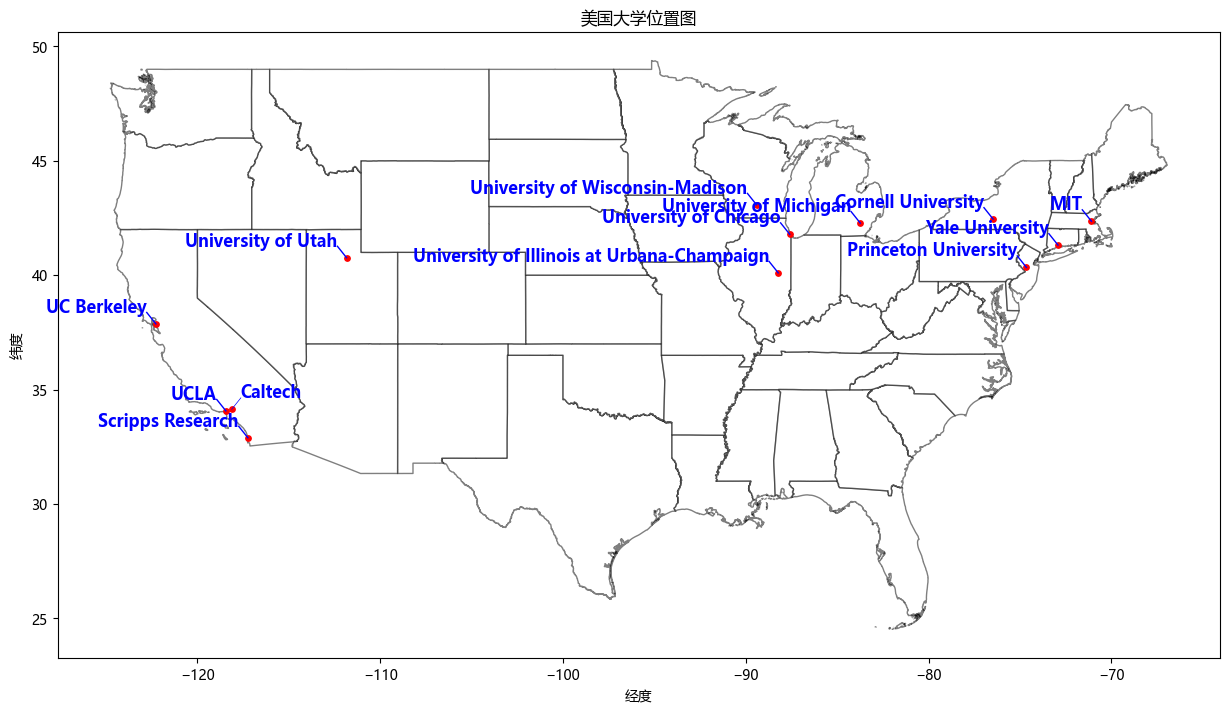

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
import os

# Set the font to one that supports Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # or ''

# Predefined coordinates for the universities (already translated to Chinese)
coordinates = {
    "Caltech": (34.1377, -118.1253),
    "UC Berkeley": (37.8715, -122.2730),
    "MIT": (42.3601, -71.0942),
    "UCLA": (34.0689, -118.4452),
    "Scripps Research": (32.8938, -117.2413),
    "Cornell University": (42.4534, -76.4735),
    "Yale University": (41.3163, -72.9223),
    "Princeton University": (40.3430, -74.6514),
    "University of Chicago": (41.7886, -87.5987),
    "University of Utah": (40.7649, -111.8421),
    "University of Michigan": (42.2780, -83.7382),
    "University of Illinois at Urbana-Champaign": (40.1018, -88.2272),
    "University of Wisconsin-Madison": (43.0760, -89.4125)
}

# Convert to DataFrame
df = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Latitude', 'Longitude'])
df.reset_index(inplace=True)
df.rename(columns={'index': 'University'}, inplace=True)

# Load the USA map excluding Alaska and Hawaii
usa = gpd.read_file('cb_2022_us_state_500k.shp')
# exclude Alaska and Hawaii in the multi-polygon
# add bounding box for the contiguous USA
usa = usa.clip(box(-125, 20, -65, 50))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
usa.plot(ax=ax, color='white', edgecolor='black', alpha=0.5)
plt.scatter(df['Longitude'], df['Latitude'], color='red', marker='o', s=15)

# Adding annotations for each point
for idx, row in df.iterrows():
    if row['University'] == "Caltech":
        # plot on left side, bold font
        label_x_offset = 0.5
        label_y_offset = 0.5
        plt.text(row['Longitude'] + label_x_offset, row['Latitude'] + label_y_offset, row['University'], fontsize=12, color='blue', ha='left', fontdict={'weight': 'bold'})
        # plot a line to the point
        plt.plot([row['Longitude'], row['Longitude'] + label_x_offset], [row['Latitude'], row['Latitude'] + label_y_offset], color='blue', linestyle='-', linewidth=0.5)
    else:
        label_x_offset = -0.5
        label_y_offset = 0.5
        plt.text(row['Longitude'] + label_x_offset, row['Latitude'] + label_y_offset, row['University'], fontsize=12, color='blue', ha='right',  fontdict={'weight': 'bold'})
        plt.plot([row['Longitude'], row['Longitude'] + label_x_offset], [row['Latitude'], row['Latitude'] + label_y_offset], color='blue', linestyle='-', linewidth=1)

plt.title("美国大学位置图")
plt.xlabel("经度")
plt.ylabel("纬度")

# set font to Arial
plt.show()



c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Program Files\Python311\Lib\site-packages\matplotlib\text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.con

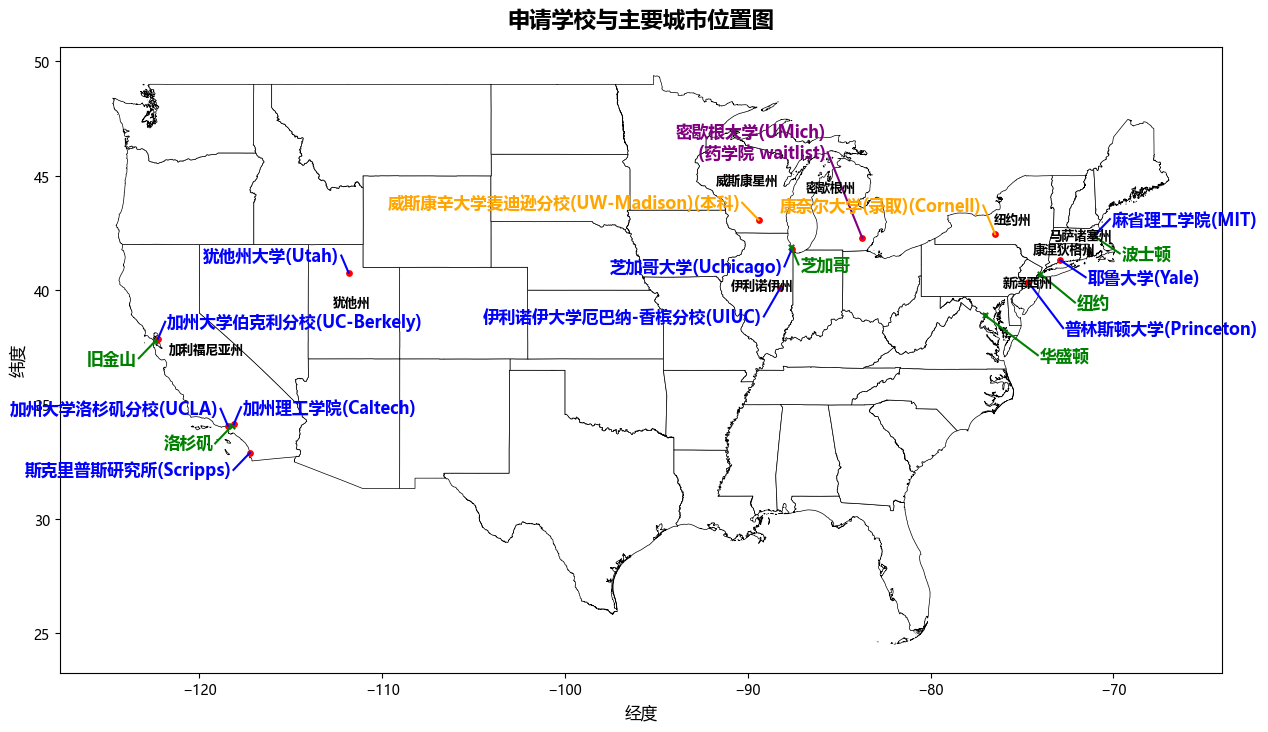

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box

# Set the font to one that supports Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # Use a font that supports Chinese

# Universities with coordinates and offsets
coordinates = {
    "加州理工学院(Caltech)": [(34.1377, -118.1253), (0.5, 0.5)],  # Caltech
    "加州大学伯克利分校(UC-Berkely)": [(37.8715, -122.2730), (0.5, 0.5)],  # UC Berkeley
    "麻省理工学院(MIT)": [(42.3601, -71.0942), (1, 0.5)],  # MIT
    "加州大学洛杉矶分校(UCLA)": [(34.0689, -118.4452), (-0.5, 0.5)],  # UCLA
    "斯克里普斯研究所(Scripps)": [(32.8938, -117.2413), (-1, -1)],  # Scripps Research
    "康奈尔大学(录取)(Cornell)": [(42.4534, -76.4735), (-0.75, 1)],  # Cornell University
    "耶鲁大学(Yale)": [(41.3163, -72.9223), (1.5, -1)],  # Yale University
    "普林斯顿大学(Princeton)": [(40.3430, -74.6514), (2, -2.25)],  # Princeton University
    "芝加哥大学(Uchicago)": [(41.7886, -87.5987), (-0.5, -1)],  # University of Chicago
    "犹他州大学(Utah)": [(40.7649, -111.8421), (-0.5, 0.5)],  # University of Utah
    "密歇根大学(UMich)\n(药学院 waitlist)": [(42.2780, -83.7382), (-2, 3.5)],  # University of Michigan
    "伊利诺伊大学厄巴纳-香槟分校(UIUC)": [(40.1018, -88.2272), (-1, -1.5)],  # University of Illinois at Urbana-Champaign
    "威斯康辛大学麦迪逊分校(UW-Madison)(本科)": [(43.0760, -89.4125), (-1, 0.5)]  # University of Wisconsin-Madison
}

# Major US cities with coordinates and offsets
cities = {
    "纽约": [(40.7128, -74.0060), (2, -1.5)],
    "洛杉矶": [(34.0522, -118.2437), (-1, -1)],
    "芝加哥": [(41.8781, -87.6298), (0.5, -1)],
    "华盛顿": [(38.9072, -77.0369), (3, -2)],
    "波士顿": [(42.3601, -71.0589), (1.5, -1)],
    "旧金山": [(37.7749, -122.4194), (-1, -1)],
    # Add more cities as needed
}

# Recreating the DataFrame mapping US state names to their respective Chinese names
state_names_mapping = {
    "California": "加利福尼亚州",
    "Massachusetts": "马萨诸塞州",
    "New York": "纽约州",
    "Connecticut": "康涅狄格州",
    "New Jersey": "新泽西州",
    "Illinois": "伊利诺伊州",
    "Utah": "犹他州",
    "Michigan": "密歇根州",
    "Wisconsin": "威斯康星州"
    # Additional states can be added as needed
}

# Convert to DataFrame
df_state_names = pd.DataFrame(list(state_names_mapping.items()), columns=['English Name', 'Chinese Name'])

df_state_names

# Convert to DataFrames with offsets
df_universities = pd.DataFrame.from_dict(coordinates, orient='index', columns=['Coordinates', 'Offset'])
df_universities[['Latitude', 'Longitude']] = pd.DataFrame(df_universities['Coordinates'].tolist(), index=df_universities.index)
df_universities[['Offset_X', 'Offset_Y']] = pd.DataFrame(df_universities['Offset'].tolist(), index=df_universities.index)

df_cities = pd.DataFrame.from_dict(cities, orient='index', columns=['Coordinates', 'Offset'])
df_cities[['Latitude', 'Longitude']] = pd.DataFrame(df_cities['Coordinates'].tolist(), index=df_cities.index)
df_cities[['Offset_X', 'Offset_Y']] = pd.DataFrame(df_cities['Offset'].tolist(), index=df_cities.index)

# Load the USA map excluding Alaska and Hawaii
usa = gpd.read_file('cb_2022_us_state_500k.shp')
usa = usa.clip(box(-125, 20, -65, 50))  # exclude Alaska and Hawaii

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))
usa.plot(ax=ax, color='white', edgecolor='black', alpha=1, linewidth=0.5)
plt.scatter(df_universities['Longitude'], df_universities['Latitude'], color='red', marker='o', s=15)
plt.scatter(df_cities['Longitude'], df_cities['Latitude'], color='green', marker='x', s=15)

# Adding annotations with individual offsets
for idx, row in df_universities.iterrows():
    if idx == "加州理工学院(Caltech)" or idx == "加州大学伯克利分校(UC-Berkely)" or idx == "麻省理工学院(MIT)" or idx == "耶鲁大学-Yale" or idx == "耶鲁大学(Yale)" or idx == "普林斯顿大学(Princeton)":
        # plot on left side, bold font
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='blue', ha='left', fontdict={'weight': 'bold'})
        # plot a line to the point
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] - 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='blue', linestyle='-', linewidth=1.5)
    elif idx == "康奈尔大学(录取)(Cornell)" or idx == "威斯康辛大学麦迪逊分校(UW-Madison)(本科)":
        # use orange color for the two universities
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='orange', ha='right', fontdict={'weight': 'bold'})
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] + 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='orange', linestyle='-', linewidth=1.5)
    elif idx == "密歇根大学(UMich)\n(药学院 waitlist)":
        # use red color for the two universities
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='purple', ha='right', fontdict={'weight': 'bold'})
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] + 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='purple', linestyle='-', linewidth=1.5)
    else:
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='blue', ha='right', fontdict={'weight': 'bold'})
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] + 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='blue', linestyle='-', linewidth=1.5)

for idx, row in df_cities.iterrows():
    if idx == "芝加哥" or idx == "纽约" or idx == "华盛顿" or idx == "波士顿":
        # plot on left side, bold font
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='green', ha='left', fontdict={'weight': 'bold'})
        # plot a line to the point
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] - 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='green', linestyle='-', linewidth=1.5)
    else:
        plt.text(row['Longitude'] + row['Offset_X'], row['Latitude'] + row['Offset_Y'], row.name, fontsize=12, color='green', ha='right', fontdict={'weight': 'bold'})
        # plot a line to the point from the middle text
        plt.plot([row['Longitude'], row['Longitude'] + row['Offset_X'] + 0.1], [row['Latitude'], row['Latitude'] + row['Offset_Y'] + 0.25], color='green', linestyle='-', linewidth=1.5)


# plot each state name in the center of the state polygon using centroid
for idx, row in usa.iterrows():
    if row['NAME'] in df_state_names['English Name'].values:
        g = gpd.GeoSeries(row['geometry'])
        centroid = g.centroid
        plt.text(centroid.x, centroid.y, df_state_names.loc[df_state_names['English Name'] == row['NAME'], 'Chinese Name'].iloc[0], fontsize=9, ha='center', fontdict={'weight': 'bold'})

plt.title("申请学校与主要城市位置图", fontsize=16, pad=15, fontdict={'weight': 'bold'})
plt.xlabel("经度", fontsize=12)
plt.ylabel("纬度", fontsize=12)
plt.savefig('申请学校与主要城市位置图.png', dpi=600, bbox_inches='tight')
plt.show()